GC1

# 1. Perkenalan

## Identifikasi Masalah
* Nama : Iqbal Awis Nurdiansyah
* Batch : RMT-19

Latar belakang : Saya adalah seorang data scientis yang akan membuat model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

**Objectiv**: Mendapatkan prediksi harga perjalanan dari platform ride-hailing 

# 2. Import libraries

In [3]:
# Import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Model
from sklearn.linear_model import LinearRegression

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Save Model
import json
import pickle , joblib

import warnings
warnings.filterwarnings("ignore")

# 3. Data Loading

In [4]:
# Loading dataset

df= pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [5]:
df.shape

(693071, 57)

# 4. EDA

In [7]:
# Menggabungkan kolom yang bertipe kategorikal
cat_cols = list(df.select_dtypes(include = 'object'))
print(len(cat_cols))
print('')
print(cat_cols)

11

['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [10]:
# Menggabungkan kolom yang bertipe numerikal
num_cols = df.columns[df.dtypes != 'object'].tolist()
print(len(num_cols))
print('')
print(num_cols)

46

['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [11]:
#Mencari Modus dari data cab_type
df['cab_type'].mode()

0    Uber
Name: cab_type, dtype: object

Uber Menjadi Aplikasi yang sering banyak digunakan

In [12]:
#Membandingan antara pengguna uber dan pengguna lyft
jumlah_pengguna = df['cab_type'].value_counts()
presentase_pengguna = (df['cab_type'].value_counts(normalize=True) *100).round(2)
group_cab=pd.DataFrame({'counts':jumlah_pengguna, 'presentase %' : presentase_pengguna })
group_cab.index=group_cab.index.set_names(['cab_type'])
group_cab



,counts,presentase %
cab_type,,
Uber,385663,55.65
Lyft,307408,44.35


**Uber** menjadi aplikasi yang sering digunakan dengan presentasi sebesar `55.65%` ketimbang **Lyft** yang hanya sebesar `44.35%`

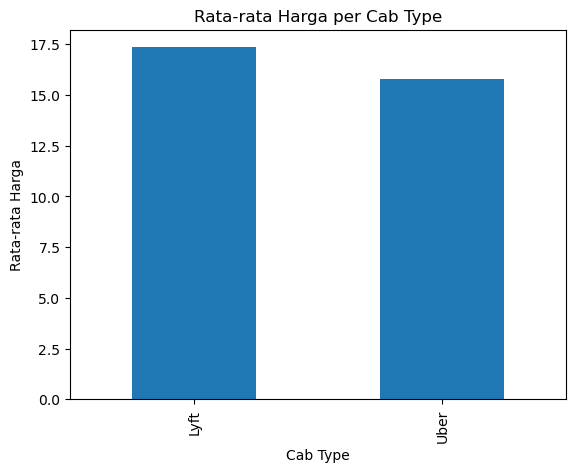

In [13]:
# Menghitung rata-rata harga per cab_type
mean_cab = df.groupby(['cab_type'])['price'].mean()

# Menampilkan bar plot
mean_cab.plot(kind='bar')
plt.title('Rata-rata Harga per Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Rata-rata Harga')
plt.show()

`Lyft` menjadi aplikasi dengan rata-rata biaya perjalanan termahal

In [14]:
#Cek tipe name pada setiap cab_type
df_grouped = df.groupby(['cab_type','name'])[['price']].mean()
df_sorted = df_grouped.sort_values(by=['cab_type', 'price'], ascending=[True, False])
print(df_sorted)

                           price
cab_type name                   
Lyft     Lux Black XL  32.324086
         Lux Black     23.062468
         Lux           17.771240
         Lyft XL       15.309363
         Lyft           9.610885
         Shared         6.029893
Uber     Black SUV     30.286763
         Black         20.523786
         UberXL        15.678144
         UberX          9.765074
         WAV            9.765019
         UberPool       8.752500
         Taxi                NaN


pada `cab_type` Lyft "Lux Black XL" menjadi tipe dengan rata-rata termahal

In [16]:
# Menampilkan rata-rata harga berdasarkan kondisi cuaca dan jenis taxi yang digunakan
price_weather = df.groupby(['cab_type', 'short_summary'])['price'].mean().sort_values(ascending = False).to_frame()
price_weather

price
cab_type short_summary                
Lyft      Foggy              17.506247
          Mostly Cloudy      17.406237
          Partly Cloudy      17.384013
          Drizzle            17.346191
          Light Rain         17.335067
          Overcast           17.322030
          Clear              17.314370
          Rain               17.312022
          Possible Drizzle   17.239823
Uber      Mostly Cloudy      15.842580
          Light Rain         15.841686
          Rain               15.828894
          Possible Drizzle   15.808930
          Overcast           15.798112
          Drizzle            15.774903
          Partly Cloudy      15.773583
          Clear              15.717256
          Foggy              15.640326

Perjalanan dengan keadaan `foggy` menjadi perjalanan dengan rata-rata biaya termahal pada aplikasi **lyft**, sementara untuk uber `Mostly Cloudy` menjadi yang termahal pada aplikasi **Uber**

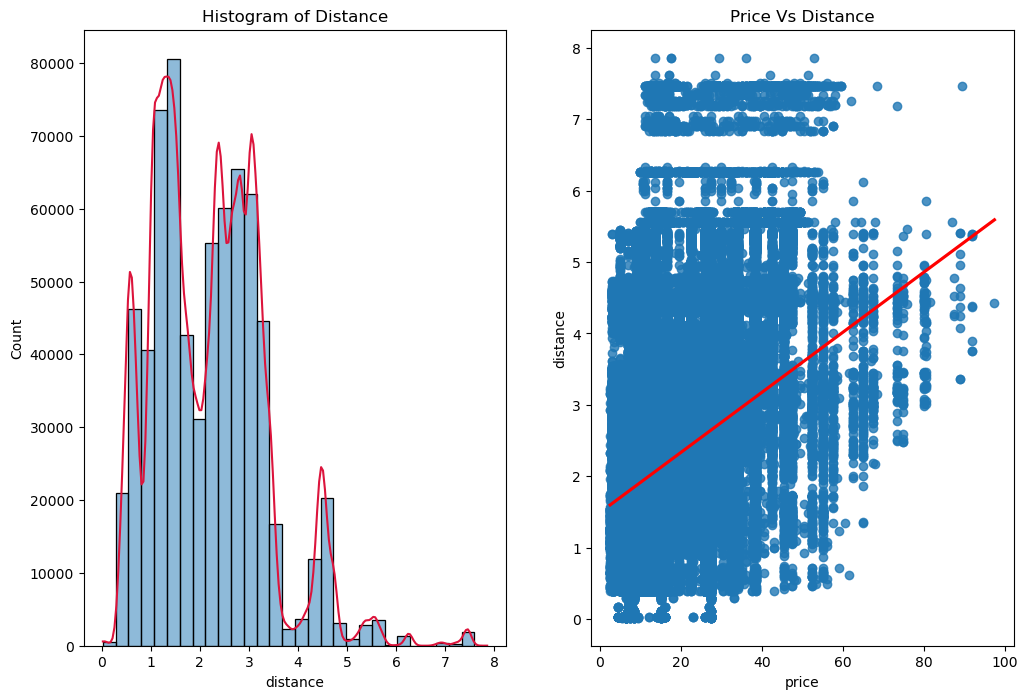

In [18]:
# Cek korelasi antara distance denga price
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax = axes[0], data = df['distance'], kde=True, bins=30)
axes[0].set_title('Histogram of Distance')
axes[0].lines[0].set_color('crimson')
sns.regplot(ax = axes[1], x = 'price', y = 'distance', data = df, line_kws = {'color' : 'red'})
axes[1].set_title('Price Vs Distance')
plt.show()

dapat disimpulkan kolom `distance` mempengaruhi kolom `price`

# 5. Feature Engineering

In [19]:
df_new=df.copy()

In [20]:
df_new.duplicated().sum()

0

tidak ada data yang terduplikasi

## Handling Cardinality

In [21]:
# Menampilkan informasi statistik pada data kategorikal
df_new[cat_cols].describe()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [22]:
#Handling cardinality kolom name menjadi 3 catagory

# VIP
df_new['name'] = np.where(df_new['name'].str.contains('Black'), 'VIP', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('Black SUV'), 'VIP', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('Lux Black XL'), 'VIP', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('Lux Black'), 'VIP', df_new['name'])

In [23]:
# Medium
df_new['name'] = np.where(df_new['name'].str.contains('Lyft XL'), 'Medium', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('Lux'), 'Medium', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('UberXL'), 'Medium', df_new['name'])

In [24]:
# Reguler
df_new['name'] = np.where(df_new['name'].str.contains('Shared'), 'Reguler', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('Lyft'), 'Reguler', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('UberX'), 'Reguler', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('WAV'), 'Reguler', df_new['name'])
df_new['name'] = np.where(df_new['name'].str.contains('UberPool'), 'Reguler', df_new['name'])

In [25]:
#cardinality = []


#for row in df_new['name']:
  #  if row = 'Shared' , 'Lyft' ,'UberX' ,'WAV' 'UberPool':
  #      cardinality.append('Reguler')
  #  elif row = 'Lyft XL':
#consumtion.append('efficient')
#elif row >=35:
  #      consumtion.append('decent')
   # elif row >=25:
  #      consumtion.append('standard')
   # else :
   #     consumtion.append('not_efficient')

In [26]:
# Cek Nilai unik yang telah dirubah
df_new.name.unique()

array(['Reguler', 'Medium', 'VIP', 'Taxi'], dtype=object)

In [27]:
#Handling cardinality kolom short_summart menjadi 4 catagory

# Cloudy
df_new['short_summary'] = np.where(df_new['short_summary'].str.contains('Cloudy'), 'Cloudy', df_new['short_summary'])
df_new['short_summary'] = np.where(df_new['short_summary'].str.contains('Overcast'), 'Cloudy', df_new['short_summary'])

# Rain
df_new['short_summary'] = np.where(df_new['short_summary'].str.contains('Rain'), 'Rain', df_new['short_summary'])
df_new['short_summary'] = np.where(df_new['short_summary'].str.contains('Drizzle'), 'Rain', df_new['short_summary'])

In [28]:
df_new['short_summary'].unique()

array(['Cloudy', 'Rain', ' Clear ', ' Foggy '], dtype=object)

## Handling Outlier

In [29]:
# Fungsi Untuk Menampilkan Grafik Histogram dan Boxplot
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4)) 
    
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins = 20)
    plt.title('Histogram')
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.title('Boxplot')
    
    plt.show()

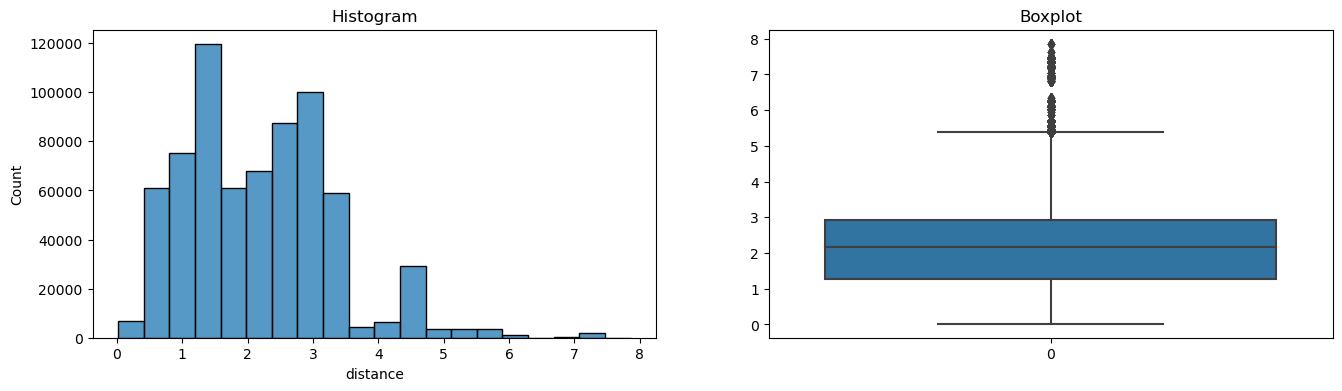



Skewness Value : 0.8343950077972692


In [30]:
# Menampilkan Grafik Histogram dan Boxplot dari Distance
diagnostic_plots(df_new, 'distance')
print('\n')
print('Skewness Value :', df_new['distance'].skew())

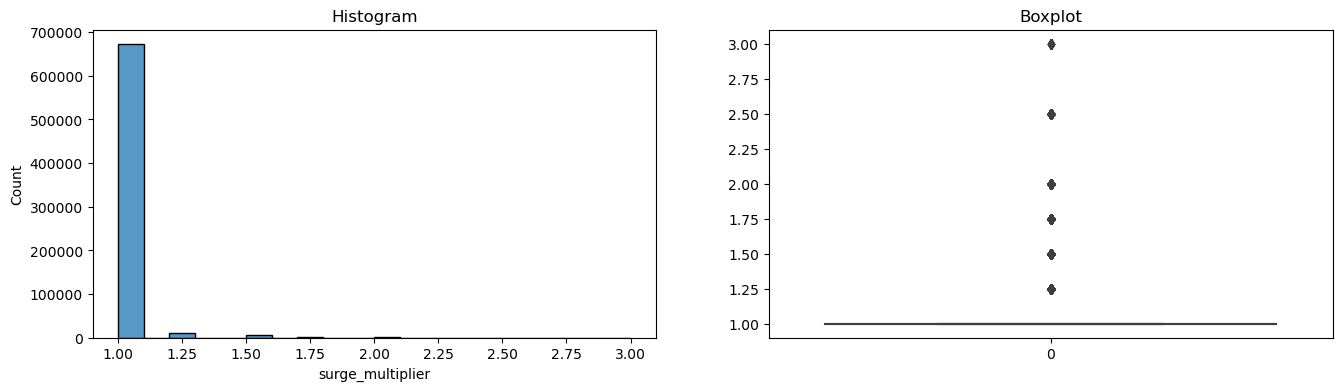



Skewness Value : 8.32024804653164


In [31]:
# Menampilkan Grafik Histogram dan Boxplot dari Surge Multiplier
diagnostic_plots(df_new, 'surge_multiplier')
print('\n')
print('Skewness Value :', df_new['surge_multiplier'].skew())

In [32]:
# Fungsi untuk menghitung batas atas dan bawah
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [33]:
# Menghitung Batas Atas dan bawah kolom distance
upper_boundary, lower_boundary = find_skewed_boundaries(df_new, 'distance', 1.5)
upper_boundary, lower_boundary

(5.38, -1.18)

In [34]:
print('Total data : {}'.format(len(df_new)))
print('Total data diatas batas   : {}'.format(len(df_new[df_new['distance'] > upper_boundary])))
print('')
print('% data diatas batas : {}'.format(len(df_new[df_new['distance'] > upper_boundary])/len(df_new) * 100))

Total data : 693071
Total data diatas batas   : 8662

% data diatas batas : 1.2497998040604787


In [35]:
# Menghitung Batas Atas dan bawah kolom distance
upper_boundary, lower_boundary = find_skewed_boundaries(df_new, 'surge_multiplier', 1.5)
upper_boundary, lower_boundary

(1.0, 1.0)

In [36]:
print('Total data : {}'.format(len(df_new)))
print('Total data diatas batas   : {}'.format(len(df_new[df_new['surge_multiplier'] > upper_boundary])))
print('')
print('% data diatas batas : {}'.format(len(df_new[df_new['surge_multiplier'] > upper_boundary])/len(df_new) * 100))

Total data : 693071
Total data diatas batas   : 20975

% data diatas batas : 3.026385464115509


*Dapat diambil kesimpulan **outlier** pada kolom `distance` dan `surge_multiplier` adlah `Natural Outlier` dikarenakan jumlah `distance` bergantung ada kebutuhan customer. Jadi Outlier pada kolom tersebut **diabaikan**

## Handling Missing Value

In [37]:
# Menampilkan jumlah data yang null
df_new.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [38]:
# Persentase Missing Value
mv_pres = df_new.price.isna().mean() * 100

print('Persentase Data Price yang Null :', mv_pres) 

Persentase Data Price yang Null : 7.949402009317949


Karena kolom `price` akan dijadikan target (y) maka kita akan **drop** data yang terdapat missing value 

In [39]:
# Mengapus data null pada kolom price
df_new.dropna(subset = ['price'], inplace = True)


In [40]:
# Menampilkan jumlah data yang null setelah dilakukan dropna
df_new.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Feature Selection

Feature yang akan digunakan adalah `cab_type , name, distance, surge_multiplier, short_summary, price`

In [41]:
# Filtering data yang akan digunakan menggunakan loc
feature = df_new.loc[:, ['cab_type','name',  'distance', 'surge_multiplier', 'short_summary', 'price']]
feature

,cab_type,name,distance,surge_multiplier,short_summary,price
0,Lyft,Reguler,0.44,1.0,Cloudy,5.0
1,Lyft,Medium,0.44,1.0,Rain,11.0
2,Lyft,Reguler,0.44,1.0,Clear,7.0
3,Lyft,VIP,0.44,1.0,Clear,26.0
4,Lyft,Medium,0.44,1.0,Cloudy,9.0
...,...,...,...,...,...,...
693065,Uber,Reguler,1.00,1.0,Cloudy,9.5
693066,Uber,Medium,1.00,1.0,Cloudy,13.0
693067,Uber,Reguler,1.00,1.0,Cloudy,9.5
693069,Uber,VIP,1.00,1.0,Cloudy,27.0


## Split  `X` (Features) and `y` (Target)

In [42]:
# Splitting between `X` and `y`

X = feature.drop(['price'], axis=1)
y = feature['price']
X

,cab_type,name,distance,surge_multiplier,short_summary
0,Lyft,Reguler,0.44,1.0,Cloudy
1,Lyft,Medium,0.44,1.0,Rain
2,Lyft,Reguler,0.44,1.0,Clear
3,Lyft,VIP,0.44,1.0,Clear
4,Lyft,Medium,0.44,1.0,Cloudy
...,...,...,...,...,...
693065,Uber,Reguler,1.00,1.0,Cloudy
693066,Uber,Medium,1.00,1.0,Cloudy
693067,Uber,Reguler,1.00,1.0,Cloudy
693069,Uber,VIP,1.00,1.0,Cloudy


In [43]:
feature

,cab_type,name,distance,surge_multiplier,short_summary,price
0,Lyft,Reguler,0.44,1.0,Cloudy,5.0
1,Lyft,Medium,0.44,1.0,Rain,11.0
2,Lyft,Reguler,0.44,1.0,Clear,7.0
3,Lyft,VIP,0.44,1.0,Clear,26.0
4,Lyft,Medium,0.44,1.0,Cloudy,9.0
...,...,...,...,...,...,...
693065,Uber,Reguler,1.00,1.0,Cloudy,9.5
693066,Uber,Medium,1.00,1.0,Cloudy,13.0
693067,Uber,Reguler,1.00,1.0,Cloudy,9.5
693069,Uber,VIP,1.00,1.0,Cloudy,27.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (510380, 5)
Test Size  :  (127596, 5)


,cab_type,name,distance,surge_multiplier,short_summary
141913,Uber,Reguler,2.22,1.0,Rain
207434,Lyft,VIP,3.22,1.0,Cloudy
524847,Uber,VIP,1.63,1.0,Clear
629294,Lyft,Medium,0.61,1.0,Rain
5225,Uber,Reguler,3.42,1.0,Rain
...,...,...,...,...,...
119762,Lyft,VIP,3.46,1.0,Cloudy
281444,Lyft,VIP,2.12,1.0,Cloudy
397249,Uber,Reguler,1.11,1.0,Cloudy
143309,Lyft,Reguler,0.65,1.0,Cloudy


## Split antara Numerikal Columns and Katagorikal Columns

In [45]:
# split data numerikal dan catagorikal

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['distance', 'surge_multiplier']
Cat Columns :  ['cab_type', 'name', 'short_summary']


In [46]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,distance,surge_multiplier
141913,2.22,1.0
207434,3.22,1.0
524847,1.63,1.0
629294,0.61,1.0
5225,3.42,1.0
...,...,...
119762,3.46,1.0
281444,2.12,1.0
397249,1.11,1.0
143309,0.65,1.0


## Feature Scaling

In [47]:
X_train_num.describe()

,distance,surge_multiplier
count,510380.000000,510380.000000
mean,2.188397,1.015041
std,1.135427,0.095263
min,0.020000,1.000000
25%,1.270000,1.000000
50%,2.160000,1.000000
75%,2.930000,1.000000
max,7.860000,3.000000


In [48]:
#Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.28061224, 0.        ],
       [0.40816327, 0.        ],
       [0.20535714, 0.        ],
       ...,
       [0.13903061, 0.        ],
       [0.08035714, 0.        ],
       [0.29591837, 0.25      ]])

karena distribusi data tidak normal kita akan menggunakan MinMaxScaler untuk Scaling

In [49]:
df_2 = pd.DataFrame(X_train_num_scaled, columns=num_columns)
df_2

,distance,surge_multiplier
0,0.280612,0.00
1,0.408163,0.00
2,0.205357,0.00
3,0.075255,0.00
4,0.433673,0.00
...,...,...
510375,0.438776,0.00
510376,0.267857,0.00
510377,0.139031,0.00
510378,0.080357,0.00


In [50]:
df_2_test= pd.DataFrame(X_test_num_scaled, columns=num_columns)
df_2_test

,distance,surge_multiplier
0,0.572704,0.0
1,0.354592,0.0
2,0.136480,0.0
3,0.114796,0.0
4,0.140306,0.0
...,...,...
127591,0.338010,0.0
127592,0.126276,0.0
127593,0.188776,0.0
127594,0.248724,0.0


## Feature Encoding

## Ordinal Encoding

In [173]:
# Display `X_train_cat`

X_train_cat

,cab_type,name,short_summary
141913,Uber,Reguler,Rain
207434,Lyft,VIP,Cloudy
524847,Uber,VIP,Clear
629294,Lyft,Medium,Rain
5225,Uber,Reguler,Rain
...,...,...,...
119762,Lyft,VIP,Cloudy
281444,Lyft,VIP,Cloudy
397249,Uber,Reguler,Cloudy
143309,Lyft,Reguler,Cloudy


In [52]:
#Grouping
encoding=X_train_cat[['name', 'short_summary']]
encoding2=X_train_cat[['cab_type']]

In [53]:
#Encoding menggunakan Ordinal Encoder
name_cat=['Reguler', 'Medium', 'VIP']
summary_cat=[' Clear ', 'Cloudy', 'Rain',' Foggy ']

enc = OrdinalEncoder(categories=[name_cat,summary_cat],
                     dtype='int16')
X_train_new=enc.fit_transform(encoding)
X_test_new=enc.transform(X_test[['name','short_summary']])
X_train_new


array([[0, 2],
       [2, 1],
       [2, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int16)

Encoding menggunakan OrdinalEncoder karena feature `name` dan `sort_summary` adalah data bertingkat

## OneHotEncoding

In [54]:
enc_2 = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_ohe = enc_2.fit_transform(encoding2)
X_test_ohe = enc_2.transform(X_test[['cab_type']])

X_train_ohe

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [55]:
X_train_ohe.shape

(510380, 2)

In [56]:
X_train_new.shape

(510380, 2)

In [57]:
feature_names = enc_2.get_feature_names_out(input_features=['cab_type'])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names)

X_train_ohe.head(3)

,cab_type_Lyft,cab_type_Uber
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [58]:
X_test_ohe.head(2)

,cab_type_Lyft,cab_type_Uber
0,1.0,0.0
1,0.0,1.0


In [59]:
X_train_new = pd.DataFrame(X_train_new, columns = ['name_enc','short_summary_enc'])
X_test_new = pd.DataFrame(X_test_new, columns = ['name_enc','short_summary_enc'])

X_test_new

,name_enc,short_summary_enc
0,0,1
1,0,2
2,0,1
3,2,2
4,2,1
...,...,...
127591,2,0
127592,0,1
127593,2,1
127594,0,1


In [60]:
X_train_new.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)

In [61]:
#Menggabungkan data yang sudah di Encoding
X_train_new = pd.concat([X_train_new,X_train_ohe], axis=1)


X_test_new = pd.concat([X_test_new,X_test_ohe], axis=1)


X_train_new.head()

,name_enc,short_summary_enc,cab_type_Lyft,cab_type_Uber
0,0,2,0.0,1.0
1,2,1,1.0,0.0
2,2,0,0.0,1.0
3,1,2,1.0,0.0
4,0,2,0.0,1.0


In [62]:
#Menggabungkan antara Numerikal dan Catagorical X_train_final

X_train_final = pd.concat([X_train_new, df_2], axis=1)

X_train_final

,name_enc,short_summary_enc,cab_type_Lyft,cab_type_Uber,distance,surge_multiplier
0,0,2,0.0,1.0,0.280612,0.00
1,2,1,1.0,0.0,0.408163,0.00
2,2,0,0.0,1.0,0.205357,0.00
3,1,2,1.0,0.0,0.075255,0.00
4,0,2,0.0,1.0,0.433673,0.00
...,...,...,...,...,...,...
510375,2,1,1.0,0.0,0.438776,0.00
510376,2,1,1.0,0.0,0.267857,0.00
510377,0,1,0.0,1.0,0.139031,0.00
510378,0,1,1.0,0.0,0.080357,0.00


In [63]:
#Menggabungkan antara numerikal dan catagorical X_test_final
X_test_final = pd.concat([X_test_new, df_2_test], axis=1)
X_test_final

,name_enc,short_summary_enc,cab_type_Lyft,cab_type_Uber,distance,surge_multiplier
0,0,1,1.0,0.0,0.572704,0.0
1,0,2,0.0,1.0,0.354592,0.0
2,0,1,1.0,0.0,0.136480,0.0
3,2,2,0.0,1.0,0.114796,0.0
4,2,1,1.0,0.0,0.140306,0.0
...,...,...,...,...,...,...
127591,2,0,0.0,1.0,0.338010,0.0
127592,0,1,1.0,0.0,0.126276,0.0
127593,2,1,0.0,1.0,0.188776,0.0
127594,0,1,0.0,1.0,0.248724,0.0


# 6. Model Definition

In [64]:
model_lin_reg = LinearRegression()
model_lin_reg

LinearRegression()

Notes :  

1. Algoritma yang dipakai adalah `Linear Regression` 
   * Karena target bersifat regresi maka algoritma yang akan dipakai adalah `LinearRegression`

2. Metrics yang akan dipakai adalah `Mean Absolute Error (MAE)`
   * Karena target bersifat numerikal oleh karena itu kita menggunakan `MAE` untuk melihat eror dan tahan terhadap outlier

# 7. Model Training

In [65]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8. Model Evaluation

Model Evaluation menggunakan Matriks MAE karena mencari prediksi bertipe `Regressi`

In [66]:
# Predict Train-Set and Test-Set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 8.60310884, 28.37039556, 24.41661699, ...,  5.50862022,
        3.74552131, 26.68267417])

In [67]:
# Model Evaluation using MAE



print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('')
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test))
print('')

error_train = mean_absolute_error(y_train, y_pred_train)
error_test = mean_absolute_error(y_test, y_pred_test)

overfitting = (error_train - error_test) / error_train * 100
print('Presentase selisih: {:.2f}%'.format(overfitting))



Error - Train Set :  3.014978390409519

Error - Test Set  :  3.017319618419184

Presentase selisih: -0.08%


* Model tergolong `Good-Fit` karena rentang antara Train dan Test tidak jauh berbeda hanya berselisih 0.08 %
* Rata-Rata rentang prediksi berkisar antara -3.17 atau + 3.17
* Jika `price` actual adalah 7 prediksi berkisar antara 4 sampai 10

In [175]:
# Membuat dataframe untuk membandingan y_test dan y_pred_test
df_pred = pd.DataFrame({
    'actual':y_test,
    'pred':y_pred_test
})

df_pred['Selisih'] = abs(df_pred['pred'] - df_pred['actual'])
df_pred.describe()

,actual,pred,Selisih
count,127596.000000,127596.000000,127596.000000
mean,16.542276,16.557869,3.017320
std,9.337082,8.454708,2.543577
min,2.500000,2.465603,0.000156
25%,9.000000,9.213481,1.162079
50%,13.500000,15.519493,2.465959
75%,22.500000,23.627777,4.155675
max,92.000000,53.761546,48.821155


# 9. Model Saving

In [68]:
#Save Model
with open('model_lin_reg.pkl', 'wb') as file_1:
    pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

with open('model_encoder_ord.pkl', 'wb') as file_3:
    pickle.dump(enc, file_3)

with open('model_encoder_ohe.pkl', 'wb') as file_4:
    pickle.dump(enc_2, file_4)


with open('list_num_cols.txt', 'w') as file_5:
    json.dump(num_columns, file_5)

with open('list_cat_cols.txt', 'w') as file_6:
    json.dump(cat_columns, file_6)


# 10. Model Inference

In [69]:
#Load file model.pkl
with open('model_lin_reg.pkl', 'rb') as file_1:
    model_lin_reg=joblib.load(file_1)
with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler=joblib.load(file_2)
with open('model_encoder_ord.pkl', 'rb') as file_3:
    model_encoder_ord=joblib.load(file_3)
with open('model_encoder_ohe.pkl', 'rb') as file_4:
    model_encoder_ohe=joblib.load(file_4)


with open('list_num_cols.txt', 'r') as file_5:
    list_num_cols=json.load(file_5)
with open('list_cat_cols.txt', 'r') as file_6:
    list_cat_cols=json.load(file_6)

In [157]:
df_inf=pd.DataFrame({
    'cab_type' : ['Lyft' , 'Lyft' , 'Uber'],
    'name' : ['Shared' , 'Lux' , 'UberXL'],
    'distance' : ['0.44' , '0.44' , '1.0'],
    'surge_multiplier' :['1.0' , '1.0' , '1.0'],
    'short_summary' : ['Mostly Cloudy' , 'Rain', 'Partly Cloudy']
})

In [158]:
df_inf

,cab_type,name,distance,surge_multiplier,short_summary
0,Lyft,Shared,0.44,1.0,Mostly Cloudy
1,Lyft,Lux,0.44,1.0,Rain
2,Uber,UberXL,5.0,1.0,Partly Cloudy


In [176]:
df_inf.to_csv('inference.csv')

In [159]:
df_inf['name'] = np.where(df_inf['name'].str.contains('Black'), 'VIP', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('Black SUV'), 'VIP', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('Lux Black XL'), 'VIP', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('Lux Black'), 'VIP', df_inf['name'])

In [160]:
# Medium
df_inf['name'] = np.where(df_inf['name'].str.contains('Lyft XL'), 'Medium', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('Lux'), 'Medium', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('UberXL'), 'Medium', df_inf['name'])

In [161]:
# Reguler
df_inf['name'] = np.where(df_inf['name'].str.contains('Shared'), 'Reguler', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('Lyft'), 'Reguler', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('UberX'), 'Reguler', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('WAV'), 'Reguler', df_inf['name'])
df_inf['name'] = np.where(df_inf['name'].str.contains('UberPool'), 'Reguler', df_inf['name'])

In [162]:
#Handling cardinality kolom short_summart menjadi 4 catagory

# Cloudy
df_inf['short_summary'] = np.where(df_inf['short_summary'].str.contains('Cloudy'), 'Cloudy', df_inf['short_summary'])
df_inf['short_summary'] = np.where(df_inf['short_summary'].str.contains('Overcast'), 'Cloudy', df_inf['short_summary'])

# Rain
df_inf['short_summary'] = np.where(df_inf['short_summary'].str.contains('Rain'), 'Rain', df_inf['short_summary'])
df_inf['short_summary'] = np.where(df_inf['short_summary'].str.contains('Drizzle'), 'Rain', df_inf['short_summary'])

In [163]:
#Split num colums
data_inf_num = df_inf[num_columns]
data_inf_num

,distance,surge_multiplier
0,0.44,1.0
1,0.44,1.0
2,5.0,1.0


In [164]:
#Split Cat colums
data_inf_cat_ord=df_inf[['name', 'short_summary']]
data_inf_cat_ord


,name,short_summary
0,Reguler,Cloudy
1,Medium,Rain
2,Medium,Cloudy


In [165]:
data_inf_cat_ohe=df_inf[['cab_type']]
data_inf_cat_ohe

,cab_type
0,Lyft
1,Lyft
2,Uber


In [168]:
data_inf_num_scaled=model_scaler.transform(data_inf_num)
data_inf_cat_ord=model_encoder_ord.transform(data_inf_cat_ord)
data_inf_cat_ohe=model_encoder_ohe.transform(data_inf_cat_ohe)
data_inf_final=np.concatenate([data_inf_num_scaled, data_inf_cat_ord, data_inf_cat_ohe] , axis=1) 

In [169]:
data_inf_final

array([[0.05357143, 0.        , 0.        , 1.        , 1.        ,
        0.        ],
       [0.05357143, 0.        , 1.        , 2.        , 1.        ,
        0.        ],
       [0.63520408, 0.        , 1.        , 1.        , 0.        ,
        1.        ]])

In [170]:
model_lin_reg.predict(data_inf_final)

array([24.80931493, 24.80931493, 45.74459623])

# 11. Kesimpulan

#### EDA

* Kolom `distance` berkorelasi/berpengaruh terhadap nilai `price`
* **Uber** menjadi aplikasi yang sering digunakan dengan presentasi sebesar `55.65%` ketimbang **Lyft** yang hanya sebesar `44.35%`
* pada `cab_type` Lyft "Lux Black XL" menjadi tipe dengan rata-rata termahal dibanding data yang lain
* Perjalanan dengan keadaan `short_summary` **Foggy** menjadi keadaan dengan rata-rata biaya perjalanan termahal 


### Model Evaluation

Model menggunakan `LinearRegression` karena target(y) akan menghasilkan data yang bersifat regresi

Mean Absolute Eror

Error - Train Set :  3.014978390409519

Error - Test Set  :  3.017319618419184

Presentase selisih: -0.08%

* Model tergolong `Good-Fit` karena rentang antara Train dan Test tidak jauh berbeda hanya berselisih 0.08 %
* Rata-Rata rentang prediksi berkisar antara -3.17 atau + 3.17
* Jika `price` actual adalah 7 prediksi berkisar antara 4 sampai 10

### Model Analyis

* Selisih terbesar antara y_test dan y_predict adalah `48.821155`
* Selisih terkecil antara y_test dan y_predict adalah `0.000156`